In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import statistics
import math

In [2]:
def initial_values():
   N=90
   M=5
   v=np.array([360, 83, 59, 130, 431, 67, 230, 52, 93, 125,670, 892, 600, 38, 48, 147, 78, 256, 63, 17,120, 164, 432, 35, 92, 110, 22, 42, 50, 323,514, 28, 87, 73, 78, 15, 26, 78, 210, 36,85, 189, 274, 43, 33, 10, 19, 389, 276, 312,94, 68, 73, 192, 41, 163, 16, 40, 195, 138,73, 152, 400, 26, 14, 170, 205, 57, 369, 435,123, 25, 94, 88, 90, 146, 55, 29, 82, 74,100, 72, 31, 29, 316, 244, 70, 82, 90, 52])
   w=np.array([[7,  0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36,  3,  8, 15, 42,  9,  0, 42, 47, 52, 32, 26, 48, 55,  6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65,  0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99,  6, 1, 69, 43, 0, 57,  7, 21, 78, 10, 37, 26, 20,  8, 4, 43, 17, 25, 36, 60, 84, 40],
               [8, 66, 98, 50,  0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83,  3,  9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78,  0, 12, 99, 84, 31, 16,  7, 33, 20, 5, 18, 96, 63, 31,  0, 70,  4, 66,  9, 15, 25, 2,  0, 48,  1, 40, 31, 82, 79, 56, 34, 3, 19, 52, 36, 95,  6, 35, 34, 74, 26, 10, 85, 63, 31, 22,  9, 92, 18],
               [3, 74, 88, 50, 55, 19, 0,  6, 30, 62, 17, 81, 25, 46, 67, 28, 36,  8,  1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16,	5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39,  0, 97, 6, 96,  2, 81, 69,  4, 32, 78, 65, 83, 62, 89, 45, 53, 52, 76, 72, 23, 89, 48, 41,  1, 27, 19, 3, 32, 82, 20,  2, 51, 18, 42,  4, 26],  
               [21, 40, 0,  6, 82, 91, 43, 30, 62, 91, 10, 41, 12,  4, 80, 77, 98, 50, 78, 35, 7,  1, 96, 67, 85,  4, 23, 38,  2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39,  9,  5, 41, 31, 36, 15, 30, 87, 28, 13, 40,  0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83, 3, 85, 2,  5, 51, 63, 52, 85, 17, 62, 7, 86, 48,  2,  1, 15, 74, 80, 57, 16 ],  
               [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44,  3, 26,  0, 39, 20, 11,  6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10 , 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38,  1, 18, 88, 19, 39, 20,  1,  7, 34, 68, 32, 31, 58, 41, 99, 92, 67, 33, 26, 25, 68, 37,  6, 11, 17, 48, 79, 63, 77, 17, 29, 18, 60]])
   
   
   c=np.array([2100,  1100,  3300,  3700,  3600])
   
   #c=np.array([850, 1400, 1500, 450, 1100]) 
   sort=np.argsort(c)
   w[:][:]=w[sort][::]	
   #print(w[0][::])
   c=c[sort][::]
   nl=[]
   for i in range(len(v)):
      sum=0
      for j in range(len(w)):
        sum=sum+(w[j][i])
        w[j][i]=w[j][i]+1
      nl.append(sum/len(w))
   #print(nl)
   #sorted_indices= np.argsort(v/nl)
   #print(w[0][::])
   sorted_indices= np.argsort(v/w[0][::])
   for i in range(len(w)):
      w[i][:]=w[i][sorted_indices]
   v=v[sorted_indices]
   #print(len(v))

   return N,M,v,w,c

In [3]:
initial_values()

(90,
 5,
 array([ 16,  17,  14,  10,  29,  33,  43,  50,  42,  55,  52,  59,  15,
         38,  25,  28,  73,  35,  22,  78,  90,  85,  19, 120,  83,  92,
         41,  78, 100,  90,  57,  26,  74, 123,  67,  82,  36, 130,  87,
         72,  48,  52,  31, 195, 192,  70, 125,  68, 164, 146,  29,  88,
        369,  73,  73, 316, 205, 147, 435,  93, 152,  63, 244,  78,  40,
        276,  82, 110, 600, 892, 138, 312, 323,  94, 274,  94, 670,  26,
        210, 360, 389, 256, 170, 400, 432, 163, 189, 230, 431, 514]),
 array([[ 71,  67,  49,  32,  86,  85, 100,  91,  75,  96,  89,  99,  24,
          58,  35,  39,  97,  45,  26,  84,  93,  79,  17,  98,  67,  72,
          32,  59,  75,  53,  32,  13,  35,  57,  31,  36,  15,  51,  34,
          27,  18,  19,  11,  67,  64,  23,  38,  19,  43,  37,   7,  20,
          83,  16,  15,  64,  41,  28,  80,  16,  26,  10,  32,  10,   5,
          34,  10,  12,  62,  73,  10,  21,  21,   6,  13,   4,  27,   1,
           7,   9,   8,   4,   2,   3, 

In [4]:
def value_generation(groups,individuals):
    N,M,v,w,c=initial_values()
    generated_individuals= np.random.uniform(50, 100, (groups * individuals, N))
    generated_individuals = np.round(generated_individuals, 2)
    population= np.array_split(generated_individuals, groups)
    return(population)

In [5]:
value_generation(1,1)

[array([[96.99, 75.31, 52.41, 97.79, 80.62, 58.16, 88.68, 94.93, 82.92,
         79.09, 82.33, 63.66, 86.89, 71.14, 65.25, 50.3 , 92.76, 57.22,
         65.72, 82.98, 78.46, 74.87, 73.18, 97.16, 51.54, 77.39, 52.19,
         91.01, 63.22, 76.87, 74.02, 67.32, 76.88, 52.13, 96.57, 84.8 ,
         92.69, 93.46, 71.48, 79.81, 99.86, 50.44, 62.96, 79.65, 77.71,
         91.91, 71.8 , 94.93, 58.52, 92.05, 57.68, 68.47, 88.32, 78.62,
         87.8 , 75.67, 79.94, 93.36, 89.42, 51.76, 56.91, 68.11, 87.27,
         73.95, 70.8 , 66.57, 56.77, 86.27, 88.66, 54.02, 68.41, 67.74,
         56.32, 52.25, 50.95, 94.14, 75.55, 81.82, 99.94, 73.78, 74.27,
         95.93, 60.02, 89.52, 73.57, 70.95, 61.79, 58.6 , 50.15, 77.53]])]

In [6]:
def weight_generation(num):
    w=np.random.random(num)
    return np.sort(w/w.sum())[::-1]

In [7]:
def random_weighted_integer(end,lambda_param=0.1):
    return min(int(-1 / lambda_param * math.log(1 - random.random())) + 0, end)

random_int = random_weighted_integer(30,0.25)
random_int

0

In [8]:
def sum_of_weights(l,w,c):
    for i in range(len(w)):
      sum = w[i][:]*l
      sum = np.sum(sum)
      if sum>c[i]:
         return True
    return False

In [9]:
def fitness_function(l,s=False):
    N,M,v,w,c = initial_values()
    l1=[float(round(el/100)) for el in l]
    vl=v*l1
    choice=0
    sum_of_profits=np.sum(vl)
    while sum_of_weights(l1,w,c):
        choice=random_weighted_integer(N-1)
        while (vl[choice]==0):
            choice=random_weighted_integer(N-1)
        sum_of_profits=sum_of_profits-vl[choice]
        l1[choice]= 0
        #l[choice] = random.uniform(0,50)
        l[choice] = 49.0
        vl=v*l1

    #l2=[l1[i]*l[i] for i in range(len(l))]
    if s==True:
        return l
    else:
        return sum_of_profits

In [10]:
def sorting(L):
    GLr=0
    GL=[]
    for sublist in range(len(L)):
        result=[]
        for element in range(len(L[0])):
            result.append(fitness_function(L[sublist][element]))
            if result[-1]>GLr:
                GLr=result[-1]
                GL=L[sublist][element]
        combined_data = list(zip(L[sublist][::], result))
        sorted_data = sorted(combined_data, key=lambda x: x[1], reverse=True)
        sorted_individuals = [item[0] for item in sorted_data]
        L[sublist]=np.array(sorted_individuals)
    return L,GL

In [11]:
def update_search(population,GL):
    temp=[element.copy() for element in population]
    print("Global Leader : " + str(GL) + " = " + str(fitness_function(GL)))
    #print("Method 2 : ")
    #print("-x-x-x-x-x-x-x-")
    for i in range(len(temp)):
        w1=weight_generation(3)
        #print("Weights = "+str(w1))
        #temp[i][0]=fitness_function(temp[i][0],True)[1]
        #print(temp[i][0])
        #print("Leader Before:" + str(np.round(population[i][0],2)) + " = " + str(fitness_function(population[i][0])))
        print("Leader Before: = " + str(fitness_function(population[i][0])))
        temp[i][0]=GL*w1[0]+population[i][0]*w1[1]+w1[2]*np.mean(population[i][2:],axis=0)
        #print("Leader After:" + str(np.round(temp[i][0],2)) + " = " + str(fitness_function(temp[i][0])))
        print("Leader After: = " + str(fitness_function(temp[i][0])))
        
        w2=weight_generation(2)
        #print("Weights = "+ str(w2))
        temp[i][1]==fitness_function(temp[i][1],True)[1]
        #print("Advocate Before:" + str(np.round(population[i][1],2)) + " = " + str(fitness_function(population[i][1])))
        print("Advocate Before: = " + str(fitness_function(population[i][1])))
        temp[i][1]=w2[0]*population[i][0]+w2[1]*np.mean(population[i][2:],axis=0)
        #print("Advocate After:" + str(np.round(temp[i][1],2)) + " = " + str(fitness_function(temp[i][1])))
        print("Advocate After: = " + str(fitness_function(temp[i][1])))

        for j in range(2,len(temp[0])):
            w2=weight_generation(2)
            temp[i][j]=w2[0]*population[i][0]+w2[1]*population[i][1]
            #print("Believers After:" + str(np.round(temp[i][j],2)) + " = " + str(fitness_function(temp[i][j])))
            print("Believers After: = " + str(fitness_function(temp[i][j])))
    population=[element.copy() for element in temp]
    
    return population

In [12]:
def saturation(GLl, tolerance=1e-6):
    return abs(sum(GLl)/len(GLl) - GLl[-1]) < tolerance

In [13]:
def changeGL(GL, threshold=50, replacement_value=51.0, priority_weight=2):
    #print(fitness_function(GL))
    # Create a list of indices with priority given to the start
    # Shuffle the list to randomize the selection
    count=0
    flag=0
    index=0
    while count<=2:
        while flag==index:
            index=random_weighted_integer(len(GL)-1)
        #print(GL[index] < threshold)
        if GL[index] < threshold:
            GL[index] = replacement_value
            #print(count)
            count=count+1
        flag=index
    return GL

In [14]:
def iterations(num,data,updated_population,GL,GLl,l=0):
    GL2=[]
    for i in range(l,num):
        
        updated_population=update_search(updated_population,GL)
        

        """for i in range(len(population)):
            for j in range(len(population[0])):
                updated_population[i][j]=fitness_function(population[i][j],True)"""

        updated_population,GL=sorting(updated_population)
        GLl.append(fitness_function(GL))
        GL2.append(fitness_function(GL))
        # Flatten the nested list
        flat_list = [item for sublist in updated_population for item in sublist]

        # Storing the results of the objective function
        A = [fitness_function(i) for i in flat_list]

        # Create a DataFrame with iteration number and values
        #data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
        #data = pd.DataFrame({'Iteration Number': 1, 'Values':flat_list, 'Result': A,'New Values':B})
        new_data = {'Iteration Number': i+1, 'Values':flat_list, 'Result': A}
        new_df = pd.DataFrame(new_data)
        # Create a DataFrame with iteration number and values
        data = pd.concat([data, new_df], ignore_index=True)
        data
        #print(GL)
        A=fitness_function(GL)
        #print(A)
        GLl.append(A)
        GL2.append(A)
        if i%5==0:
            if saturation(GLl):
                #print("Stopped at Iteration : " + str(i+1))
                nGL=changeGL(GL)
                run=0
                while fitness_function(nGL)<= fitness_function(GL):
                        nGL=changeGL(GL)
                        run=run+1
                        if run==5:
                            #if fitness_function(nGL)<= fitness_function(GL):
                            #    nGL=GL
                            break
                GL=nGL
                GLl=[]
                #return data,population,GL,GL1
            #else:
                GLl=[]
    return data,updated_population,GL,GLl

In [15]:
population=value_generation(3,5)

updated_population=[element.copy() for element in population]

# Flatten the nested list
flat_list = [item for sublist in population for item in sublist]

for i in range(len(updated_population)):
    for j in range(len(updated_population[0])):
        updated_population[i][j]=fitness_function(updated_population[i][j],True)

flat_list2= [item for sublist in updated_population for item in sublist]

# Storing the results of the objective function
A = [fitness_function(i) for i in flat_list2]

# Create a DataFrame with iteration number and values
#data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A,'Values Used':flat_list2})
data

,Iteration Number,Values,Result,Values Used
0,0,"[78.15, 71.26, 50.16, 55.71, 56.12, 85.45, 60....",10805.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
1,0,"[53.14, 53.52, 67.11, 94.07, 81.97, 67.76, 89....",10797.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
2,0,"[68.57, 98.67, 56.31, 70.2, 86.0, 90.46, 88.64...",10820.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
3,0,"[64.98, 87.95, 56.71, 82.98, 53.42, 72.93, 74....",10359.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
4,0,"[98.2, 95.52, 68.7, 71.29, 58.85, 90.86, 50.45...",10806.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
5,0,"[79.33, 72.88, 91.82, 70.72, 81.46, 63.56, 59....",10633.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
6,0,"[55.52, 77.99, 92.34, 80.01, 69.85, 96.86, 71....",10460.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
7,0,"[61.42, 55.42, 65.04, 80.61, 51.19, 72.5, 55.7...",10402.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
8,0,"[77.76, 52.48, 96.56, 66.28, 80.87, 99.07, 97....",10772.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."
9,0,"[76.3, 57.57, 94.6, 97.56, 87.3, 89.08, 50.88,...",10474.0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49...."


In [16]:
updated_population,GL=sorting(updated_population)
GLl=[]
GLl.append(fitness_function(GL))
# Flatten the nested list
flat_list = [item for sublist in updated_population for item in sublist]

# Storing the results of the objective function"
A = [fitness_function(i) for i in flat_list]

# Create a DataFrame with iteration number and values
#data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
data

,Iteration Number,Values,Result
0,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10820.0
1,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10806.0
2,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10805.0
3,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10797.0
4,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10359.0
5,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10772.0
6,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10633.0
7,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10474.0
8,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10460.0
9,0,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",10402.0


In [17]:
data,updated_populatio,GL,GLl=iterations(100,data,updated_population,GL,GLl,l=0)

Global Leader : [49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.
 49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.
 49.   49.   49.   49.   49.   49.   53.36 49.   49.   49.   49.   49.
 49.   49.   49.   59.9  76.57 49.   75.24 57.63 49.   49.   97.44 88.13
 95.21 52.44 87.92 81.58 83.32 61.36 99.05 57.22 87.99 99.94 94.3  96.67
 97.76 76.66 53.89 68.46 84.71 57.82 71.77 92.1  55.75 59.6  64.48 82.2
 98.56 91.41 78.84 61.63 50.96 84.88 96.79 94.76 75.96 96.48 82.62 58.83
 73.23 53.57 70.14 81.58 91.49 97.21] = 10946.0
Leader Before: = 10820.0
Leader After: = 10723.0
Advocate Before: = 10806.0
Advocate After: = 10314.0
Believers After: = 10878.0
Believers After: = 10833.0
Believers After: = 10753.0
Leader Before: = 10772.0
Leader After: = 10835.0
Advocate Before: = 10633.0
Advocate After: = 10583.0
Believers After: = 10956.0
Believers After: = 10726.0
Believers After: = 10416.0
Leader Before: = 10946.0
Leader After: = 10946.0
Advocate Before: 

In [18]:
result = data.loc[data['Iteration Number']==100]
result

,Iteration Number,Values,Result
1500,100,"[49.00000000000001, 49.00000000000001, 49.0000...",11035.0
1501,100,"[49.00000000000001, 49.00000000000001, 49.0000...",11035.0
1502,100,"[49.000000000000014, 49.000000000000014, 49.00...",11035.0
1503,100,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",11035.0
1504,100,"[49.00000000000001, 49.00000000000001, 49.0000...",11035.0
1505,100,"[48.99999999999999, 48.99999999999999, 48.9999...",11035.0
1506,100,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",11035.0
1507,100,"[49.00000000000001, 49.00000000000001, 49.0000...",11035.0
1508,100,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",11035.0
1509,100,"[49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49....",11035.0


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x600 with 0 Axes>

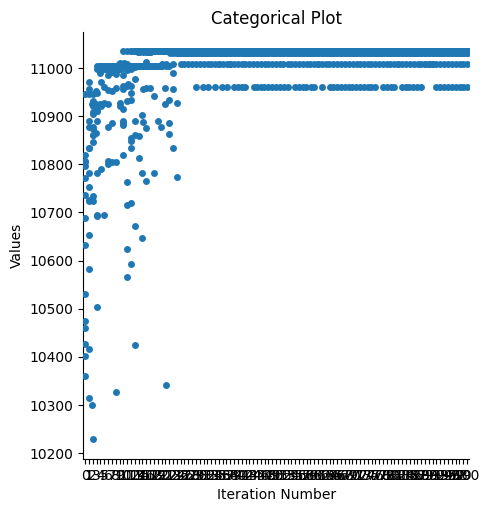

In [19]:
plt.figure(figsize=(10, 6))

# Create a categorical plot using catplot with stripplot kind
sns.catplot(data=data, x='Iteration Number', y='Result', kind='strip', jitter=True)


# Set labels and title
plt.xlabel('Iteration Number')
plt.ylabel('Values')
plt.title('Categorical Plot')

# Display the plot
#plt.grid(True)
plt.show

In [20]:
len(GL)

90

In [21]:
def runs(num,iter):
    l=[]

    for i in range(num):
        population=value_generation(3,5)

        updated_population=[element.copy() for element in population]

        for i in range(len(updated_population)):
            for j in range(len(updated_population[0])):
                updated_population[i][j]=fitness_function(updated_population[i][j],True)

        updated_population,GL=sorting(updated_population)
        GLl=[]
        GLl.append(fitness_function(GL))
        # Flatten the nested list
        flat_list = [item for sublist in updated_population for item in sublist]

        # Storing the results of the objective function
        A = [fitness_function(i) for i in flat_list]

        # Create a DataFrame with iteration number and values
        #data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
        data = pd.DataFrame({'Iteration Number': 0, 'Values':flat_list, 'Result': A})
        data,population,GL,GLl=iterations(iter,data,population,GL,GLl,l=0)
        N,M,V,w,W=initial_values()
        g=fitness_function(GL)
        nl=fitness_function(GL,True)
        nl=[round(element/100) for element in nl]
        sum_of_weights=[]
        for i in range(len(w)):
            sum = w[i][:]*nl
            sum_of_weights.append(np.sum(sum))
        l.append([g,sum_of_weights,nl])
    return l

In [22]:
Result=runs(30,50)

Global Leader : [49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.
 49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.   49.
 49.   49.   49.   49.   49.   49.   49.   49.   66.24 49.   49.   49.
 49.   49.   56.38 93.2  49.   56.08 49.   73.93 49.   63.42 73.45 59.96
 49.   83.01 98.67 80.91 53.35 85.72 81.01 67.46 89.12 87.4  76.32 80.78
 65.04 85.83 64.91 69.47 51.73 88.04 77.49 88.66 91.02 70.88 77.19 55.77
 80.6  56.33 80.15 70.12 60.85 60.67 88.01 60.69 95.76 56.96 86.23 88.01
 60.95 90.91 96.17 79.8  97.91 89.15] = 10929.0
Leader Before: = 10644.0
Leader After: = 10616.0
Advocate Before: = 10843.0
Advocate After: = 10642.0
Believers After: = 10918.0
Believers After: = 10916.0
Believers After: = 10836.0
Leader Before: = 10635.0
Leader After: = 10732.0
Advocate Before: = 10314.0
Advocate After: = 10562.0
Believers After: = 10750.0
Believers After: = 10953.0
Believers After: = 10377.0
Leader Before: = 10642.0
Leader After: = 10643.0
Advocate Before:

In [23]:
# Using zip and unpacking
list1, list2 ,list3= zip(*Result)

# Converting the result to lists
l = list(list1)
list2 = list(list2)
list3 =list(list3)

print(l)  # Output: ['a', 'd', 'e']
print(list2)  # Output: ['b', 'c', 'f']
print(list3)

[11026.0, 11033.0, 11023.0, 11052.0, 11048.0, 11052.0, 11052.0, 11031.0, 11048.0, 11052.0, 11048.0, 11052.0, 11033.0, 11035.0, 11028.0, 11028.0, 11030.0, 11031.0, 11048.0, 11031.0, 11048.0, 11052.0, 11052.0, 11048.0, 11052.0, 11018.0, 11008.0, 11031.0, 11031.0, 11052.0]
[[1097, 1749, 2280, 2478, 2219], [1094, 1730, 2166, 2379, 2148], [1094, 1810, 2317, 2526, 2194], [1098, 1794, 2096, 2391, 2104], [1097, 1757, 2137, 2370, 2168], [1098, 1794, 2096, 2391, 2104], [1098, 1794, 2096, 2391, 2104], [1090, 1758, 2152, 2379, 2136], [1097, 1757, 2137, 2370, 2168], [1098, 1794, 2096, 2391, 2104], [1097, 1757, 2137, 2370, 2168], [1098, 1794, 2096, 2391, 2104], [1094, 1730, 2166, 2379, 2148], [1098, 1752, 2091, 2360, 2191], [1098, 1816, 2153, 2379, 2153], [1098, 1809, 2332, 2488, 2188], [1098, 1743, 2149, 2391, 2148], [1090, 1758, 2152, 2379, 2136], [1097, 1757, 2137, 2370, 2168], [1090, 1758, 2152, 2379, 2136], [1097, 1757, 2137, 2370, 2168], [1098, 1794, 2096, 2391, 2104], [1098, 1794, 2096, 2391,

In [24]:
N,M,v,w,W=initial_values()
#print("Number of Items = " + str(len(v)))
#print("w = "+ str(w))
#print("v = "+ str(v))
print("W = "+ str(W))
print("Values = " + str(l))
print("Run = " + str(len(l)))
print("Average = " + str(sum(l)/len(l)))
print("Maximum = " + str(max(l)))
print("Minimum = "+ str(min(l)))
print("Frequency of Highest = " + str(l.count(max(l))))
print("Frequency of Lowest = " + str(l.count(min(l))))
print("Standard Deviation = " + str(statistics.stdev(l)))
print("Time for 30 runs = ")
print("Sum of Weights for maximum = " + str(list2[l.index(max(l))]))



count=len(l)
while l.count(min(l))==1:
    if len(l)>count-3:
        print(len(l))
        l.remove(min(l))
        print("After removal of outlier Standard Deviation = " + str(statistics.stdev(l)))
    else:
        break

W = [1100 2100 3300 3600 3700]
Values = [11026.0, 11033.0, 11023.0, 11052.0, 11048.0, 11052.0, 11052.0, 11031.0, 11048.0, 11052.0, 11048.0, 11052.0, 11033.0, 11035.0, 11028.0, 11028.0, 11030.0, 11031.0, 11048.0, 11031.0, 11048.0, 11052.0, 11052.0, 11048.0, 11052.0, 11018.0, 11008.0, 11031.0, 11031.0, 11052.0]
Run = 30
Average = 11039.1
Maximum = 11052.0
Minimum = 11008.0
Frequency of Highest = 9
Frequency of Lowest = 1
Standard Deviation = 12.546053095530167
Time for 30 runs = 
Sum of Weights for maximum = [1098, 1794, 2096, 2391, 2104]
30
After removal of outlier Standard Deviation = 11.282315382672506
29
After removal of outlier Standard Deviation = 10.637049656593007
28
After removal of outlier Standard Deviation = 10.228723313629157
